In [4]:
"""
Script for visualizing InTheWild dataset statistics and features.
This script can be converted to a Jupyter notebook using jupytext.
"""

'\nScript for visualizing InTheWild dataset statistics and features.\nThis script can be converted to a Jupyter notebook using jupytext.\n'

In [14]:
# Setup Python path
import os
import sys

# Add project root to Python path
notebook_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")

Added e:\PWr\deepfakes to Python path


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
from utils.dataset.inthewild_extractor import extract_labels, extract_audio_files

In [16]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\Kacper\AppData\Local\Temp\ipykernel_15872\1253565385.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [17]:
# Set random seed for reproducibility
np.random.seed(42)

In [18]:
# Load dataset information
labels = extract_labels()
audio_files = extract_audio_files()

In [19]:
# Create DataFrame with labels
df = pd.DataFrame({
    'file': list(audio_files.keys()),
    'label': [labels[os.path.basename(f)] for f in audio_files.keys()]
})

In [20]:
# Print basic statistics
print(f"Total number of samples: {len(df)}")
print(f"\nClass distribution:")
print(df['label'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Total number of samples: 31779

Class distribution:
0    62.82%
1    37.18%
Name: label, dtype: object


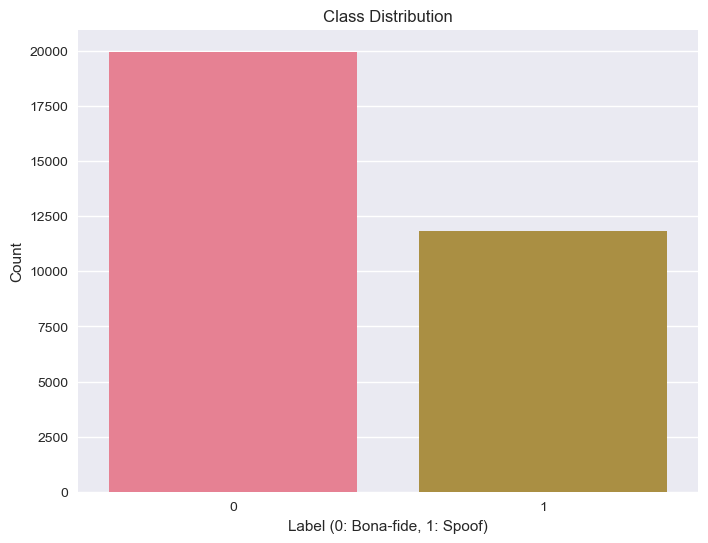

In [21]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label (0: Bona-fide, 1: Spoof)')
plt.ylabel('Count')
plt.show()

In [23]:
def plot_waveform(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title or 'Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

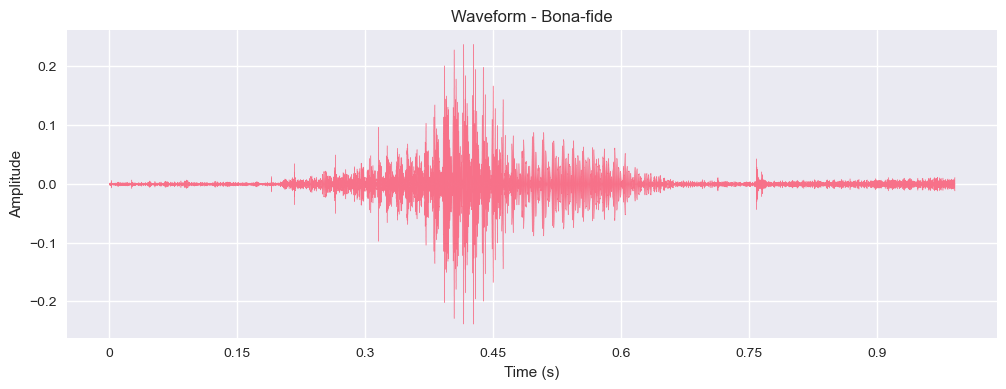

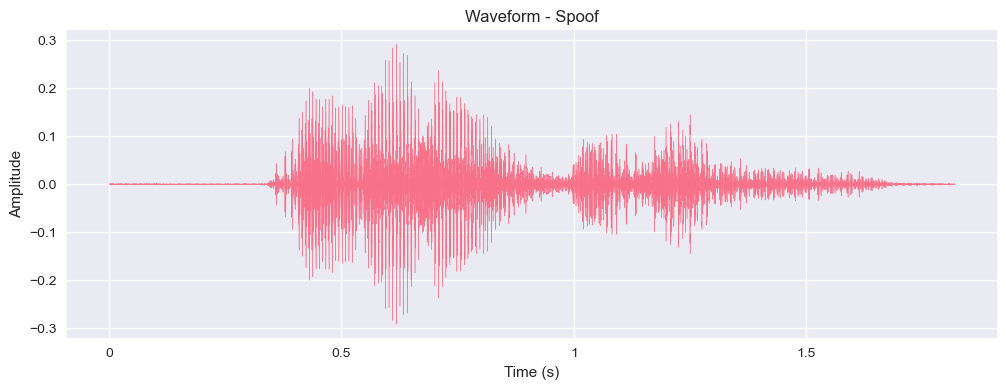

In [24]:
# Plot examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_waveform(sample['file'], f'Waveform - {"Bona-fide" if label == 0 else "Spoof"}')

In [26]:
def plot_mfcc(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'MFCC')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

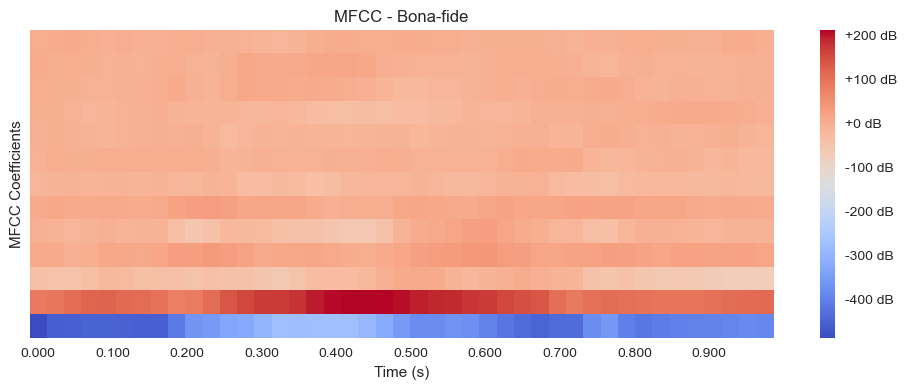

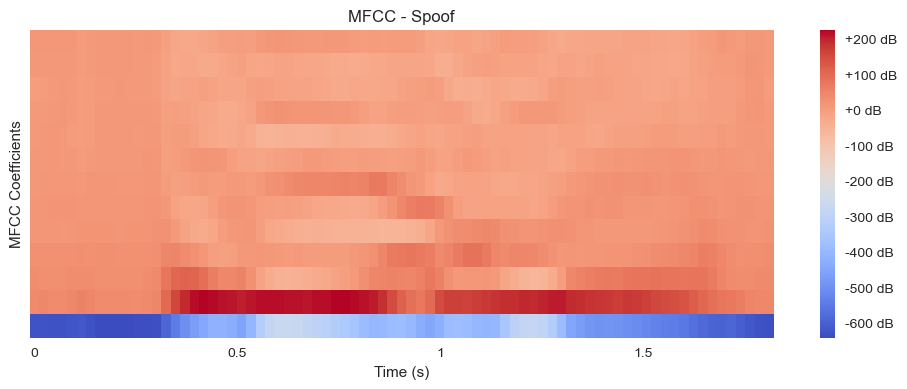

In [27]:
# Plot MFCC for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_mfcc(sample['file'], f'MFCC - {"Bona-fide" if label == 0 else "Spoof"}')

In [28]:
def plot_spectrogram(audio_path, title=None):
    y, sr = librosa.load(audio_path)
    D = librosa.stft(y)
    DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or 'Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

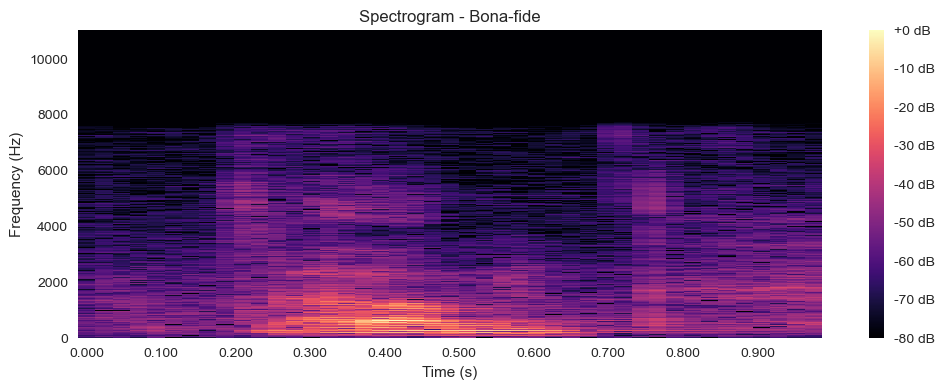

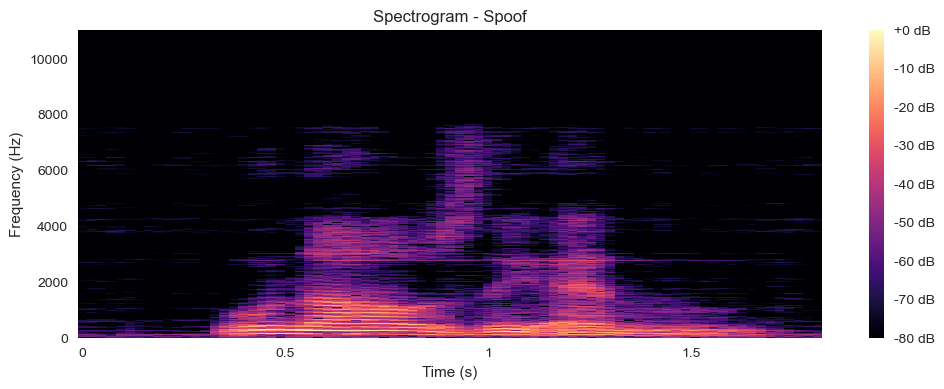

In [29]:
# Plot spectrograms for examples from each class
for label in [0, 1]:
    sample = df[df['label'] == label].iloc[0]
    plot_spectrogram(sample['file'], f'Spectrogram - {"Bona-fide" if label == 0 else "Spoof"}')

In [30]:
def extract_features(audio_path):
    y, sr = librosa.load(audio_path)
    
    # Extract various features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    
    return {
        'mfcc_mean': np.mean(mfcc, axis=1),
        'mfcc_std': np.std(mfcc, axis=1),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_rolloff_mean': np.mean(spectral_rolloff),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth)
    }

In [31]:
# Extract features for a subset of samples
n_samples = 100  # Adjust as needed
features_list = []

In [32]:
for _, row in tqdm(df.sample(n_samples).iterrows(), total=n_samples):
    features = extract_features(row['file'])
    features['label'] = row['label']
    features_list.append(features)

100%|██████████| 100/100 [00:04<00:00, 24.98it/s]


In [33]:
# Create DataFrame with features
features_df = pd.DataFrame(features_list)

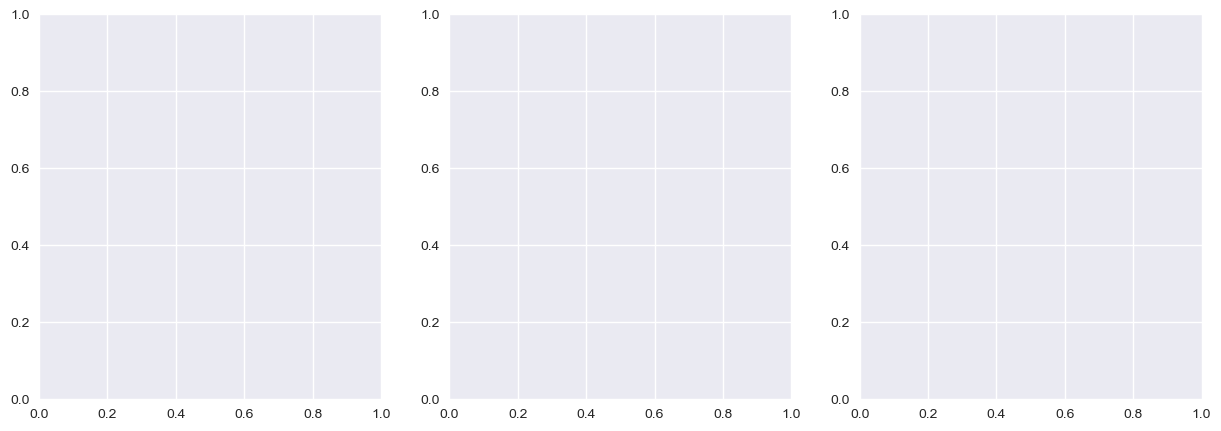

In [34]:
# Plot feature distributions
feature_cols = ['spectral_centroid_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [35]:
for i, col in enumerate(feature_cols):
    sns.boxplot(data=features_df, x='label', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Label (0: Bona-fide, 1: Spoof)')

In [36]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [37]:
# Plot MFCC coefficient distributions
mfcc_cols = [f'mfcc_mean_{i}' for i in range(13)]
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

ValueError: Could not interpret input 'mfcc_mean_0'

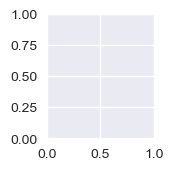

In [38]:
for i, col in enumerate(mfcc_cols):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=features_df, x='label', y=col)
    plt.title(f'MFCC {i}')
    plt.xlabel('')
    plt.ylabel('')

In [ ]:
plt.tight_layout()
plt.show() 